Importing and Data Cleaning


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Online Retail.csv')
df.drop_duplicates(inplace=True)
df.dropna(subset=['InvoiceDate'], inplace=True)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

Inspecting the data

In [ ]:
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Remove Duplicates and Null Values

In [ ]:
df = df.drop_duplicates()
df = df.dropna(subset=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country'])


Convert Date Columns to Datetime

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


<ipython-input-24-1f26bb90d392>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


Set up a SQL Database (SQLite for simplicity)

In [ ]:
import sqlite3
from google.colab import files

conn = sqlite3.connect('ecommerce.db')
df.to_sql('sales', conn, if_exists='replace', index=False)

# Close the connection to release the lock
conn.close()

# Download the SQLite database file
files.download('ecommerce.db')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Data Aggregation and Visualisation**

In [ ]:
!pip install ipython-sql


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.4 MB/s eta 0:00:00


In [ ]:
%load_ext sql


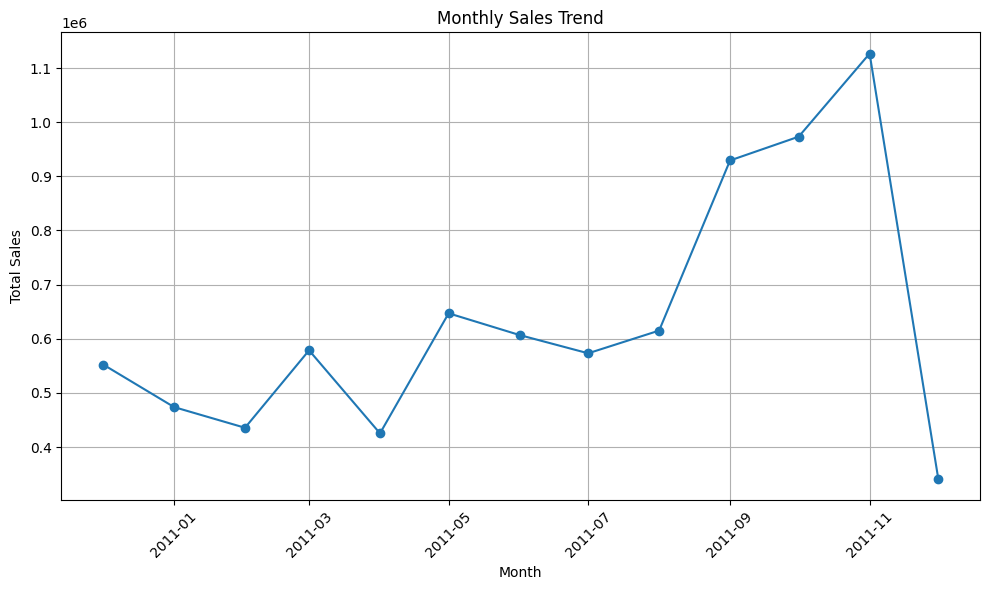

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('ecommerce.db')

# Execute SQL query and capture results
query = """
    SELECT strftime('%Y-%m', InvoiceDate) AS Month, SUM(Quantity * UnitPrice) AS TotalSales
    FROM sales
    GROUP BY Month;
"""
df = pd.read_sql_query(query, conn)

# Convert Month column to datetime format for proper sorting
df['Month'] = pd.to_datetime(df['Month'])

# Sort DataFrame by Month
df = df.sort_values('Month')

# Plotting the Monthly Sales Trend
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['TotalSales'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Close the database connection
conn.close()



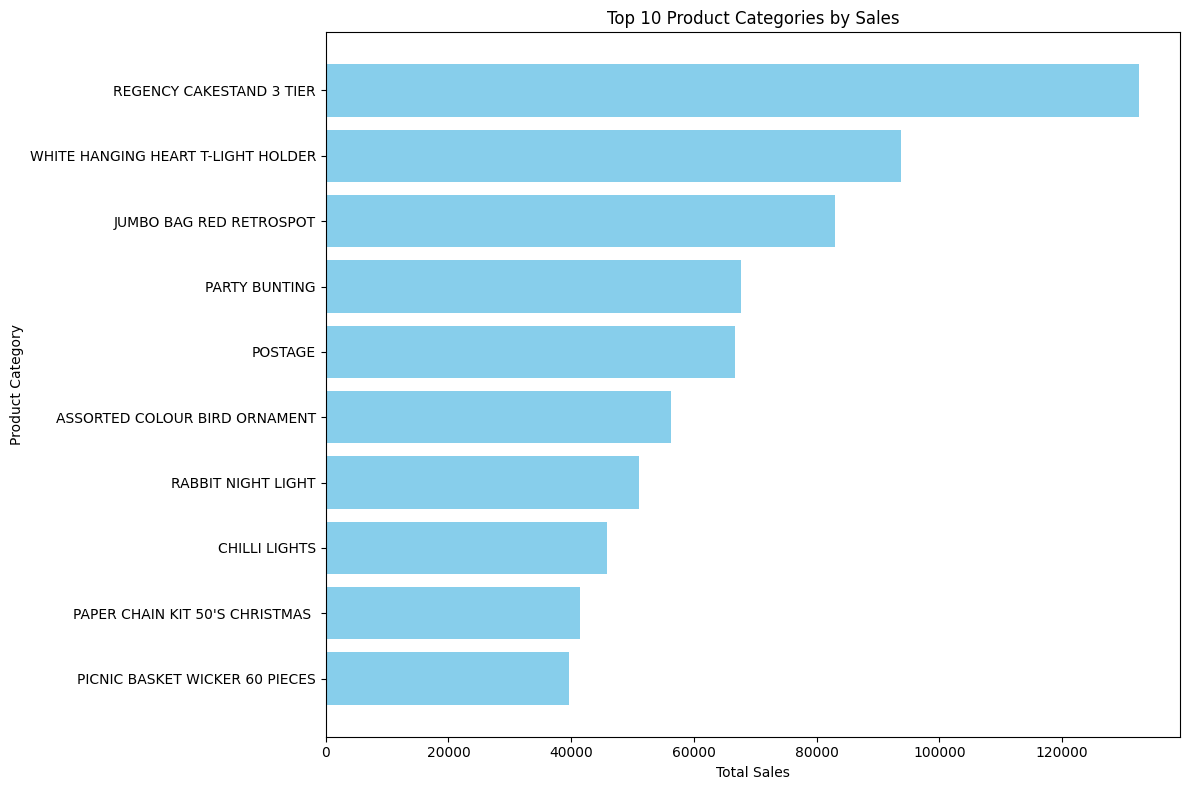

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('ecommerce.db')

# Define your SQL query
query = """
    SELECT Description, SUM(Quantity * UnitPrice) AS TotalSales
    FROM sales
    GROUP BY Description
    ORDER BY TotalSales DESC
    LIMIT 10;
"""

# Execute SQL query and capture results into a DataFrame
df = pd.read_sql_query(query, conn)

# Plotting the Top Product Categories by Sales
plt.figure(figsize=(12, 8))
plt.barh(df['Description'], df['TotalSales'], color='skyblue')
plt.xlabel('Total Sales')
plt.ylabel('Product Category')
plt.title('Top 10 Product Categories by Sales')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest sales at the top
plt.tight_layout()
plt.show()

# Close the database connection
conn.close()



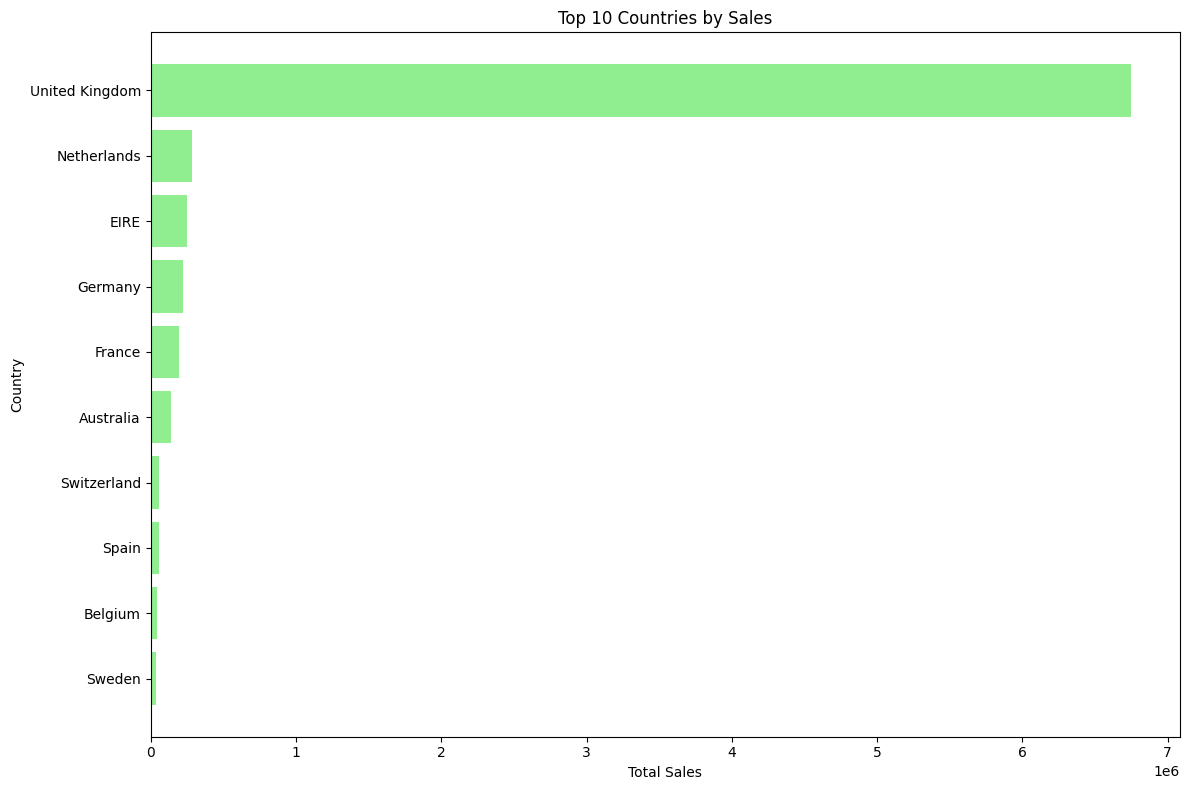

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('ecommerce.db')

# Define your SQL query
query = """
    SELECT Country, SUM(Quantity * UnitPrice) AS TotalSales
    FROM sales
    GROUP BY Country
    ORDER BY TotalSales DESC
    LIMIT 10;
"""

# Execute SQL query and capture results into a DataFrame
df = pd.read_sql_query(query, conn)

# Plotting the Top Countries by Sales
plt.figure(figsize=(12, 8))
plt.barh(df['Country'], df['TotalSales'], color='lightgreen')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.title('Top 10 Countries by Sales')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest sales at the top
plt.tight_layout()
plt.show()

# Close the database connection
conn.close()


Export Aggregated Data to Excel


In [ ]:
import pandas as pd
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('ecommerce.db')

# Execute SQL queries
df_monthly_sales = pd.read_sql_query("SELECT strftime('%Y-%m', InvoiceDate) as Month, SUM(Quantity * UnitPrice) as TotalSales FROM sales GROUP BY Month;", conn)
df_category_sales = pd.read_sql_query("SELECT Description, SUM(Quantity * UnitPrice) as TotalSales FROM sales GROUP BY Description;", conn)
df_country_sales = pd.read_sql_query("SELECT Country, SUM(Quantity * UnitPrice) as TotalSales FROM sales GROUP BY Country;", conn)

# Export to Excel
with pd.ExcelWriter('sales_performance.xlsx') as writer:
    df_monthly_sales.to_excel(writer, sheet_name='Monthly Sales', index=False)
    df_category_sales.to_excel(writer, sheet_name='Category Sales', index=False)
    df_country_sales.to_excel(writer, sheet_name='Country Sales', index=False)
conn.close()

**Sales Forecasting**

Using ARIMA (statsmodels)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the monthly sales data from sales_performance.xlxx
data = {
    'Month': pd.to_datetime(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04',
                             '2011-05', '2011-06', '2011-07', '2011-08', '2011-09',
                             '2011-10', '2011-11', '2011-12']),
    'TotalSales': [552372.86, 473731.9, 435534.07, 578576.21, 425222.671,
                   647011.67, 606862.52, 573112.321, 615078.09, 929356.232,
                   973306.38, 1126815.07, 341539.43]
}

# Create a DataFrame
df = pd.DataFrame(data)
df.set_index('Month', inplace=True)

# Set the frequency explicitly to 'MS' (Month Start)
df.index.freq = 'MS'

# Print the prepared data
print(df)


             TotalSales
Month                  
2010-12-01   552372.860
2011-01-01   473731.900
2011-02-01   435534.070
2011-03-01   578576.210
2011-04-01   425222.671
2011-05-01   647011.670
2011-06-01   606862.520
2011-07-01   573112.321
2011-08-01   615078.090
2011-09-01   929356.232
2011-10-01   973306.380
2011-11-01  1126815.070
2011-12-01   341539.430


In [ ]:
# Fit the SARIMAX model
model = SARIMAX(df['TotalSales'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Print summary of the model
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                         TotalSales   No. Observations:                   13
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Fri, 14 Jun 2024   AIC                             10.000
Time:                                    20:21:21   BIC                               -inf
Sample:                                12-01-2010   HQIC                               nan
                                     - 12-01-2011                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0        nan        nan        nan         nan         nan
ma.L1               0        nan   

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1233: RuntimeWarning: divide by zero encountered in divide
  np.inner(score_obs, score_obs) /
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:1233: RuntimeWarning: invalid value encountered in divide
  np.inner(score_obs, score_obs) /
/usr/local/lib/python3.10/dist-packages/statsmodels/tools/eval_measures.

In [ ]:
# Forecasting
forecast_steps = 12  # Forecasting for the next 12 months
forecast = results.get_forecast(steps=forecast_steps)
forecast_ci = forecast.conf_int()

# Print the forecasted values
print(forecast.predicted_mean)


2012-01-01    262898.470
2012-02-01    224700.640
2012-03-01    367742.780
2012-04-01    214389.241
2012-05-01    436178.240
2012-06-01    396029.090
2012-07-01    362278.891
2012-08-01    404244.660
2012-09-01    718522.802
2012-10-01    762472.950
2012-11-01    915981.640
2012-12-01    130706.000
Freq: MS, Name: predicted_mean, dtype: float64


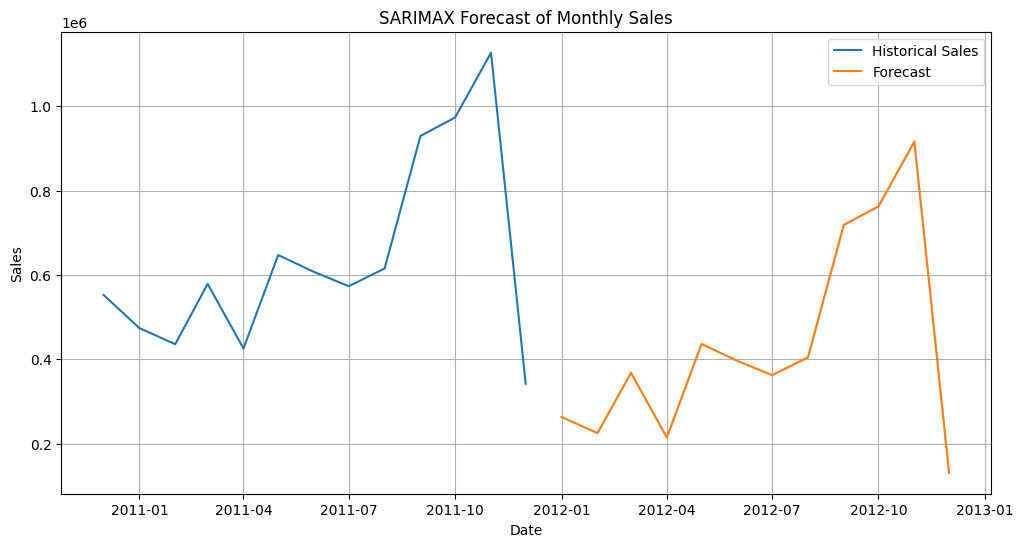

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['TotalSales'], label='Historical Sales')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean.values, label='Forecast')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.title('SARIMAX Forecast of Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


Using Prophet:

In [ ]:
!pip install pystan
!pip install prophet
!pip install numpy pandas matplotlib setuptools



INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgzgecikj/szbm168j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgzgecikj/ocfcph0_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95927', 'data', 'file=/tmp/tmpgzgecikj/szbm168j.json', 'init=/tmp/tmpgzgecikj/ocfcph0_.json', 'output', 'file=/tmp/tmpgzgecikj/prophet_model5qfgm7e8/prophet_model-20240614204425.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
20:44:25 - cmdstanpy - INFO - Chain [1] start processing
IN

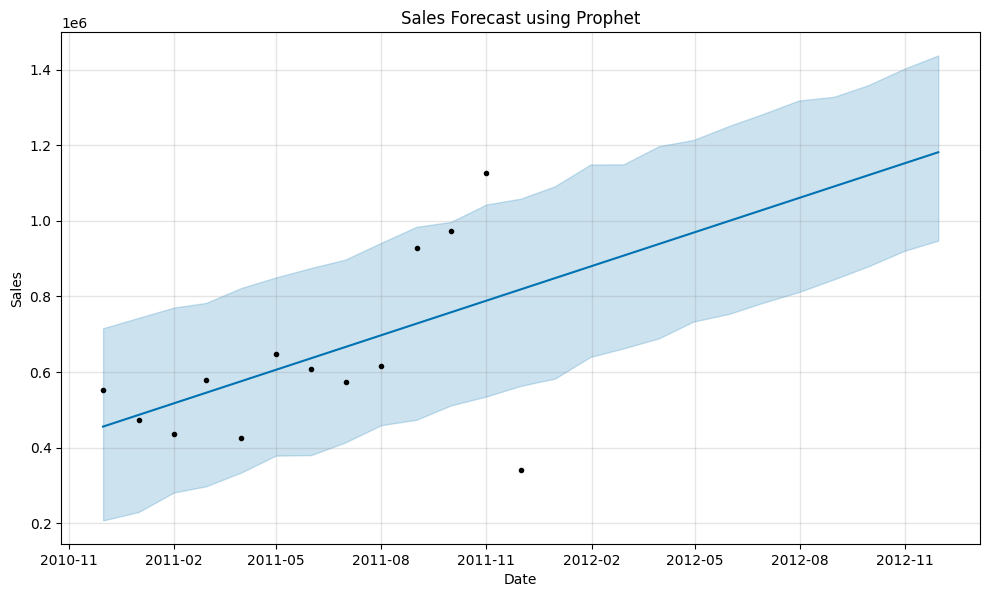

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Example data to simulate the structure
data = {
    'Month': pd.to_datetime(['2010-12', '2011-01', '2011-02', '2011-03', '2011-04',
                             '2011-05', '2011-06', '2011-07', '2011-08', '2011-09',
                             '2011-10', '2011-11', '2011-12']),
    'TotalSales': [552372.86, 473731.9, 435534.07, 578576.21, 425222.671,
                   647011.67, 606862.52, 573112.321, 615078.09, 929356.232,
                   973306.38, 1126815.07, 341539.43]
}

# Create a DataFrame (replace this with loading your actual data)
monthly_sales = pd.DataFrame(data)

# Reset index if necessary
monthly_sales.reset_index(inplace=True)

# Rename columns to 'ds' and 'y' as required by Prophet
monthly_sales.rename(columns={'Month': 'ds', 'TotalSales': 'y'}, inplace=True)

# Specify date format explicitly
monthly_sales['ds'] = pd.to_datetime(monthly_sales['ds'], format='%Y-%m')

# Fit the Prophet model
model = Prophet()
model.fit(monthly_sales)

# Make a future dataframe for 12 months
future = model.make_future_dataframe(periods=12, freq='M')

# Forecasting
forecast = model.predict(future)

# Plotting
model.plot(forecast)
plt.title('Sales Forecast using Prophet')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


**1. What are the monthly and seasonal trends in sales?**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the provided data is in a dictionary format
data = {
    'year': [2010, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011],
    'month': [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'total_sales': [552372.86, 473731.9, 435534.07, 578576.21, 425222.671, 647011.67, 606862.52,
                    573112.321, 615078.09, 929356.232, 973306.38, 1126815.07, 341539.43]
}

# Create a DataFrame from the dictionary
monthly_sales_data = pd.DataFrame(data)

# Print the DataFrame to verify
print(monthly_sales_data)


    year  month  total_sales
0   2010     12   552372.860
1   2011      1   473731.900
2   2011      2   435534.070
3   2011      3   578576.210
4   2011      4   425222.671
5   2011      5   647011.670
6   2011      6   606862.520
7   2011      7   573112.321
8   2011      8   615078.090
9   2011      9   929356.232
10  2011     10   973306.380
11  2011     11  1126815.070
12  2011     12   341539.430


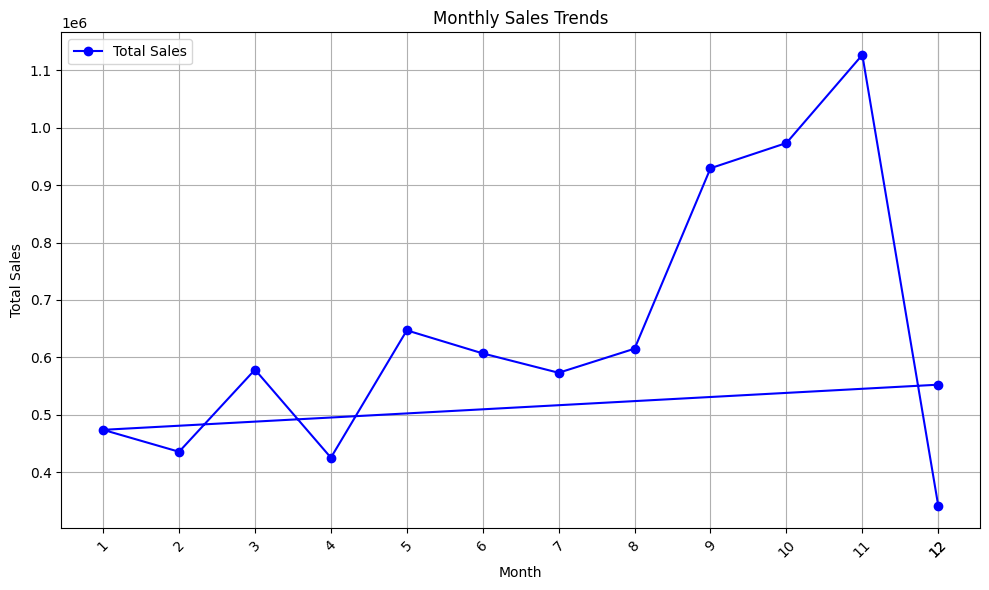

In [ ]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales_data['month'], monthly_sales_data['total_sales'], marker='o', linestyle='-', color='b', label='Total Sales')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(monthly_sales_data['month'], rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**2. Which product categories generate the highest revenue?**

                     Product_category  total_revenue
0            REGENCY CAKESTAND 3 TIER      132567.70
1  WHITE HANGING HEART T-LIGHT HOLDER       93767.80
2             JUMBO BAG RED RETROSPOT       83056.52
3                       PARTY BUNTING       67628.43
4                             POSTAGE       66710.24


<ipython-input-2-17748bdfa1b1>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='Product_category', data=top_10_products, palette='viridis')


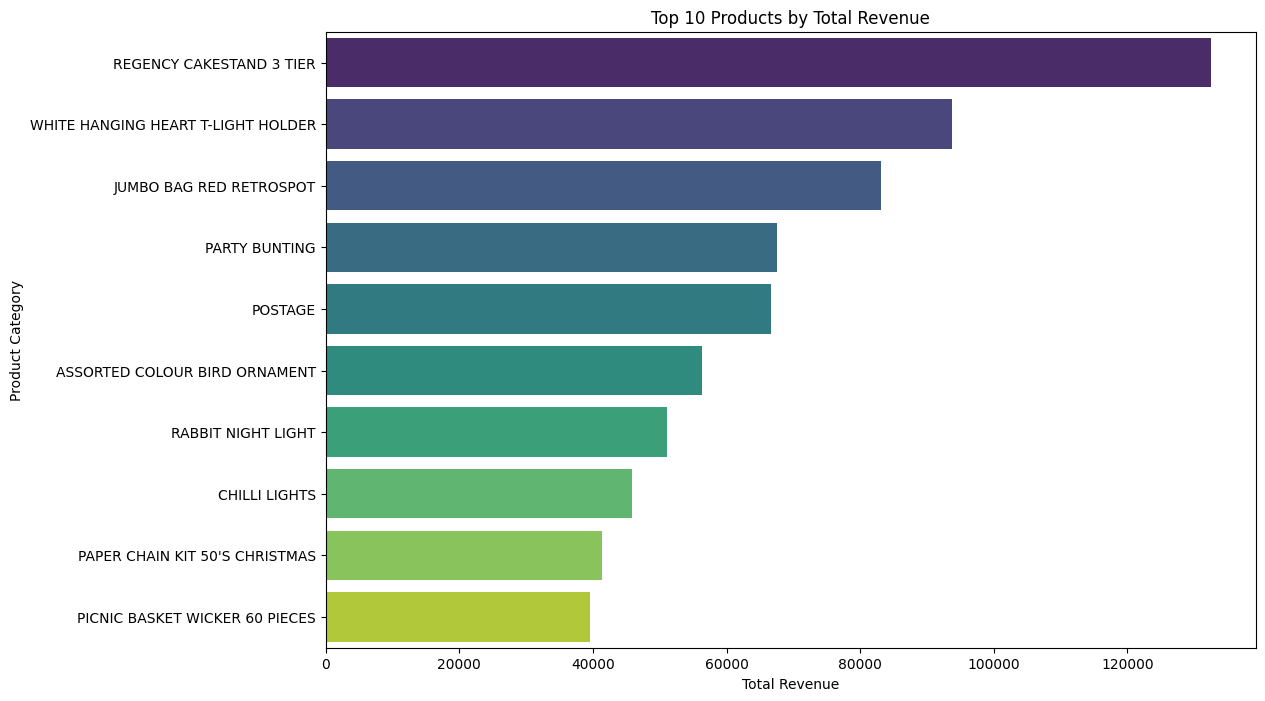

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/product highest revenue - product highest revenue.csv.csv')

# Print the DataFrame to verify
print(df.head())

# Plotting the top 10 products by total revenue
plt.figure(figsize=(12, 8))
top_10_products = df.head(10)  # Select the top 10 products
sns.barplot(x='total_revenue', y='Product_category', data=top_10_products, palette='viridis')
plt.title('Top 10 Products by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.show()


What is the customer lifetime value (CLV) for different segments?


    customer_id  avg_purchase_value  purchase_frequency       clv    Segment
1       12347.0            0.624523            0.209931  0.530259  Very High
5       12352.0            0.474752            0.152827  0.308664     Medium
12      12359.0            0.643757            0.328261  0.805300  Very High
13      12360.0            0.563006            0.369129  0.762670  Very High
15      12362.0            0.526162            0.398011  0.750630  Very High


<ipython-input-7-8c6eec8d1eb1>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clv_data, x='Segment', y='clv', palette='viridis')


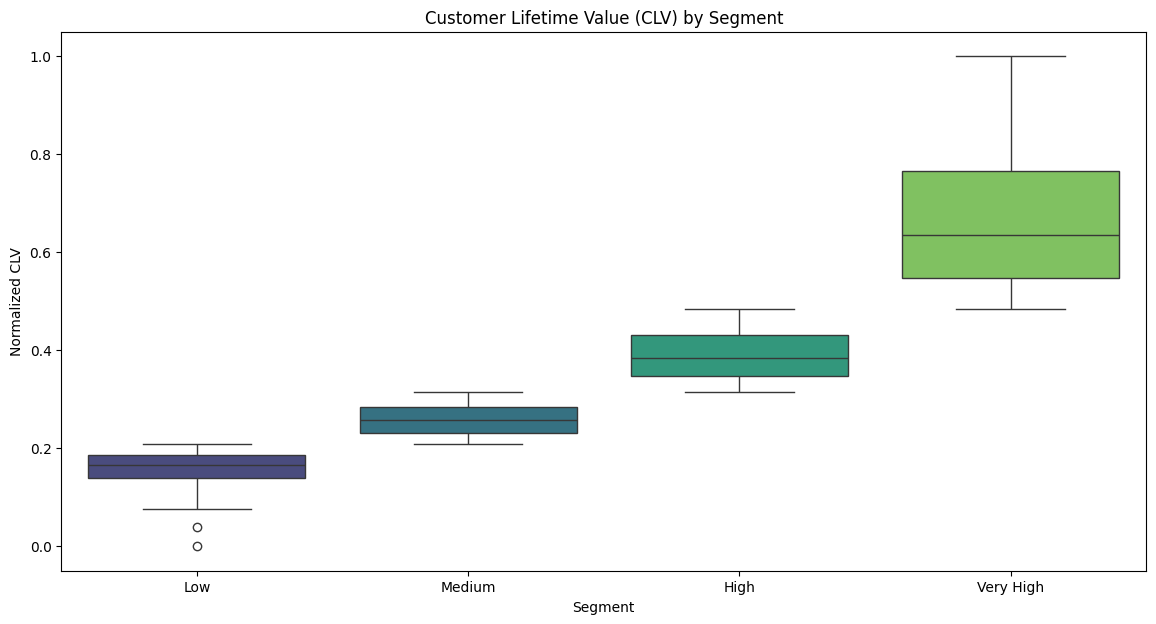

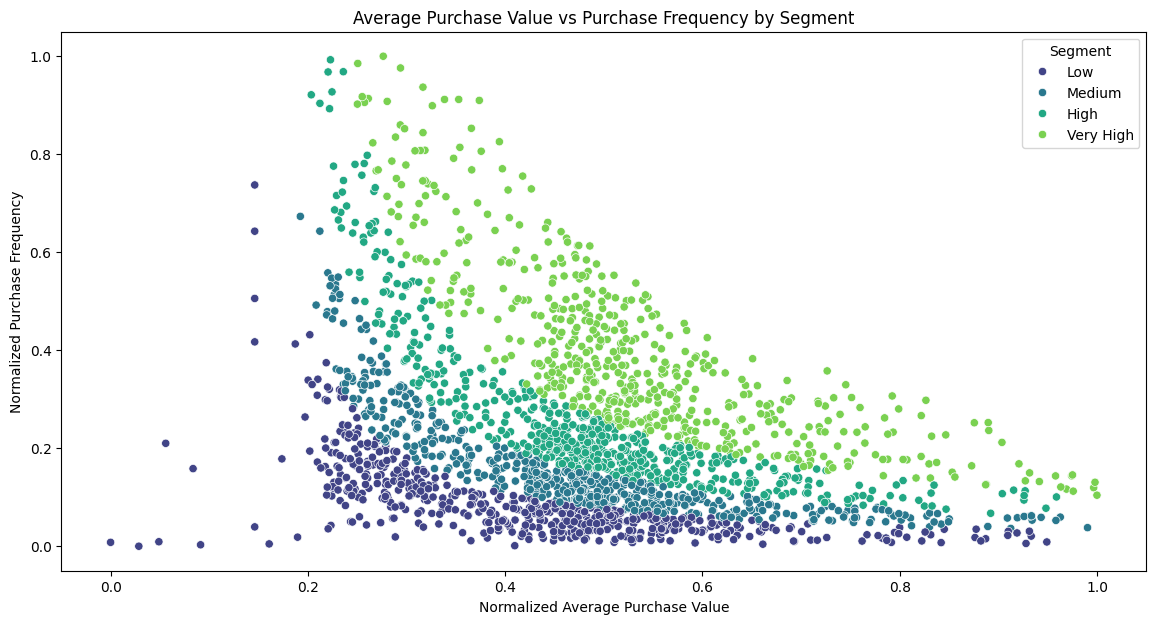

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load your CLV data
clv_data = pd.read_csv('/content/drive/MyDrive/sales_data.csv')

# Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for the relevant columns
clv_data = remove_outliers(clv_data, 'avg_purchase_value')
clv_data = remove_outliers(clv_data, 'purchase_frequency')
clv_data = remove_outliers(clv_data, 'clv')

# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
clv_data[['avg_purchase_value', 'purchase_frequency', 'clv']] = scaler.fit_transform(clv_data[['avg_purchase_value', 'purchase_frequency', 'clv']])

# Segmenting customers based on normalized CLV
clv_data['Segment'] = pd.qcut(clv_data['clv'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Print the first few rows to check the segments
print(clv_data.head())

# Visualize the CLV distribution across different segments
plt.figure(figsize=(14, 7))
sns.boxplot(data=clv_data, x='Segment', y='clv', palette='viridis')
plt.title('Customer Lifetime Value (CLV) by Segment')
plt.xlabel('Segment')
plt.ylabel('Normalized CLV')
plt.show()

# Visualize avg_purchase_value and purchase_frequency by segment
plt.figure(figsize=(14, 7))
sns.scatterplot(data=clv_data, x='avg_purchase_value', y='purchase_frequency', hue='Segment', palette='viridis')
plt.title('Average Purchase Value vs Purchase Frequency by Segment')
plt.xlabel('Normalized Average Purchase Value')
plt.ylabel('Normalized Purchase Frequency')
plt.legend(title='Segment')
plt.show()


**WORKFLOW**

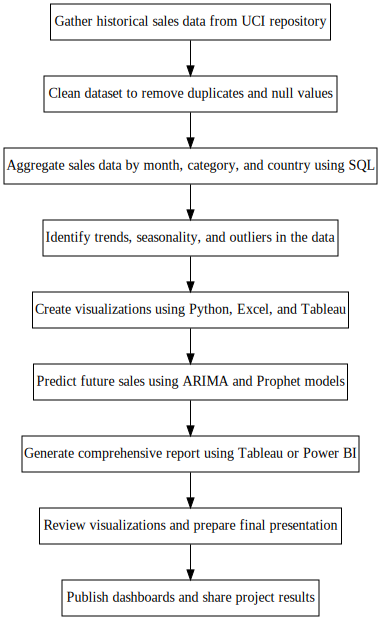

In [4]:
from graphviz import Digraph

# Create a new Digraph (directed graph)
workflow = Digraph('E-commerce Sales Analysis and Forecasting Workflow', filename='workflow.gv', format='png')

# Define nodes (steps)
nodes = [
    ('Data Collection', 'Gather historical sales data from UCI repository'),
    ('Data Cleaning', 'Clean dataset to remove duplicates and null values'),
    ('Data Aggregation', 'Aggregate sales data by month, category, and country using SQL'),
    ('Exploratory Data Analysis', 'Identify trends, seasonality, and outliers in the data'),
    ('Data Visualization', 'Create visualizations using Python, Excel, and Tableau'),
    ('Sales Forecasting', 'Predict future sales using ARIMA and Prophet models'),
    ('Business Intelligence Report', 'Generate comprehensive report using Tableau or Power BI'),
    ('Final Review and Presentation', 'Review visualizations and prepare final presentation'),
    ('Deployment and Sharing', 'Publish dashboards and share project results')
]

# Add nodes to the graph with explicit positions
for i, (step, description) in enumerate(nodes):
    x = i % 3 * 3  # Distribute columns every 3 units
    y = -i // 3 * 2  # Distribute rows every 2 units downwards
    workflow.node(step, label=description, shape='box', pos=f"{x},{y}!")

# Define edges (connections between steps)
edges = [
    ('Data Collection', 'Data Cleaning'),
    ('Data Cleaning', 'Data Aggregation'),
    ('Data Aggregation', 'Exploratory Data Analysis'),
    ('Exploratory Data Analysis', 'Data Visualization'),
    ('Data Visualization', 'Sales Forecasting'),
    ('Sales Forecasting', 'Business Intelligence Report'),
    ('Business Intelligence Report', 'Final Review and Presentation'),
    ('Final Review and Presentation', 'Deployment and Sharing')
]

# Add edges to the graph
for edge in edges:
    workflow.edge(edge[0], edge[1])

# Save the graph as a DOT file
workflow.save()

# Render the graph as a PNG (requires Graphviz installation)
workflow.render(filename='workflow', format='png', cleanup=True)

# Display the workflow
workflow
